# Customer Segmentation and Churn Rate Prediction

It's a company specializing in video streaming and internet services. The dataset contains customer information, encompassing account details and churn status.

| Measure | Description |
|---------|-------------|
| viewer_id | A unique ID that identifies each customer |
| Gender | The viewer's gender: Male, Female |
| Age | The customer’s current age, in years, at the time the fiscal quarter ended (Q2 2022) |
| Married | Indicates if the customer is married: Yes, No |
| number_of_family_dependents | Indicates the number of dependents that live with the customer (dependents could be children, parents, grandparents, etc.) |
| City | The city of the customer’s primary residence in California |
| Zip Code | The zip code of the customer’s primary residence |
| Latitude | The latitude of the customer’s primary residence |
| Longitude | The longitude of the customer’s primary residence |
| Number of Referrals | Indicates the number of times the customer has referred a friend or family member to this company to date |
| Tenure in Months | Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above |
| Offer | Identifies the last marketing offer that the customer accepted: None, Offer A, Offer B, Offer C, Offer D, Offer E |
| Internet Service | Indicates if the customer subscribes to Internet service with the company: Yes, No |
| Internet Type | Indicates the customer's type of internet connection: DSL, Fiber Optic, Cable (if the customer is not subscribed to internet service, this will be None) |
| Avg Monthly GB Download | Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above (if the customer is not subscribed to internet service, this will be 0) |
| Online Security | Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No) |
| Online Backup | Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No) |
| Device Protection Plan | Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No) |
| Premium Tech Support | Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No (if the customer is not subscribed to internet service, this will be No) |
| Streaming TV | Indicates if the customer uses their Internet service to stream television programing from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No) |
| Streaming Movies | Indicates if the customer uses their Internet service to stream movies from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No) |
| Streaming Music | Indicates if the customer uses their Internet service to stream music from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No) |
| Unlimited Hi-res Streaming | Indicates if the customer has paid an additional monthly fee to have unlimited hi-res streaming: Yes, No |
| Subscription Type | Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year |
| Paperless Billing | Indicates if the customer has chosen paperless billing: Yes, No |
| Payment Method | Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check |
| Monthly Charge | Indicates the customer’s current total monthly charge for all their services from the company |
| Total Charges | Indicates the customer’s total charges, calculated to the end of the quarter specified above |
| Total Refunds | Indicates the customer’s total refunds, calculated to the end of the quarter specified above |
| Total Extra Data Charges | Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above |
| Total Long Distance Charges | Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above |
| Total Revenue | Indicates the company's total revenue from this customer, calculated to the end of the quarter specified above (Total Charges - Total Refunds + Total Extra Data Charges + Total Long Distance Charges) |
| Viewer Status | Indicates the status of the customer at the end of the quarter: Churned, or Stayed |


## 0. Import Packages and Load Dataset

In [1]:
import pandas as pd
import numpy as np

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.preprocessing import OrdinalEncoder

# Prediction Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
# Load Dataset
df = pd.read_csv("telecom_customer_churn.csv")
df.head()

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0002-ORFBO,Female,37,Yes,0,SD,93225,34.827662,-118.999073,2,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,SD,91206,34.162515,-118.203869,0,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,SD,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,SD,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,SD,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


## 1. Data Preprocessing & Exploratory Data Analytics

#### 1.1 Shape

In [3]:
# Check number of rows and columns in the dataset
df.shape

(6588, 33)

#### 1.2 Data type

In [4]:
# Check data type and convert data type if needed
df.dtypes

viewer_id                       object
gender                          object
age                              int64
married                         object
number_of_family_dependents      int64
city                            object
zip_code                         int64
latitude                       float64
longitude                      float64
number_of_referrals              int64
tenure_in_months                 int64
offer                           object
internet_service                object
internet_type                   object
avg_monthly_gb_download        float64
online_security                 object
online_backup                   object
device_protection_plan          object
premium_tech_support            object
streaming_tv                    object
streaming_movies                object
streaming_music                 object
unlimited_hi-res_streaming      object
subscription_type               object
paperless_billing               object
payment_method           

In [5]:
# Convert zip code from int to string
df['zip_code'] = str(df['zip_code'])

# Convert below column to categorical data
categorical_columns = [
    'gender', 'married', 'city', 'offer', 'internet_service', 'internet_type',
    'online_security', 'online_backup', 'device_protection_plan',
    'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music',
    'unlimited_hi-res_streaming', 'subscription_type', 'paperless_billing', 'payment_method'
]

# Fill NA value
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

#### 1.3 Missing values

In [6]:
# Check if there is null value in the dataset and handle missing value properly
df.isna().sum()

viewer_id                         0
gender                            0
age                               0
married                           0
number_of_family_dependents       0
city                              0
zip_code                          0
latitude                          0
longitude                         0
number_of_referrals               0
tenure_in_months                  0
offer                             0
internet_service                  0
internet_type                     0
avg_monthly_gb_download        1344
online_security                   0
online_backup                     0
device_protection_plan            0
premium_tech_support              0
streaming_tv                      0
streaming_movies                  0
streaming_music                   0
unlimited_hi-res_streaming        0
subscription_type                 0
paperless_billing                 0
payment_method                    0
monthly_charge                    0
total_charges               

In [7]:
# Replace NAs with 0 in column "Avg Monthly GB Download" 
df['avg_monthly_gb_download'] = df['avg_monthly_gb_download'].fillna(0)

In [8]:
df.dtypes

viewer_id                       object
gender                          object
age                              int64
married                         object
number_of_family_dependents      int64
city                            object
zip_code                        object
latitude                       float64
longitude                      float64
number_of_referrals              int64
tenure_in_months                 int64
offer                           object
internet_service                object
internet_type                   object
avg_monthly_gb_download        float64
online_security                 object
online_backup                   object
device_protection_plan          object
premium_tech_support            object
streaming_tv                    object
streaming_movies                object
streaming_music                 object
unlimited_hi-res_streaming      object
subscription_type               object
paperless_billing               object
payment_method           

In [9]:
df.isna().sum()

viewer_id                      0
gender                         0
age                            0
married                        0
number_of_family_dependents    0
city                           0
zip_code                       0
latitude                       0
longitude                      0
number_of_referrals            0
tenure_in_months               0
offer                          0
internet_service               0
internet_type                  0
avg_monthly_gb_download        0
online_security                0
online_backup                  0
device_protection_plan         0
premium_tech_support           0
streaming_tv                   0
streaming_movies               0
streaming_music                0
unlimited_hi-res_streaming     0
subscription_type              0
paperless_billing              0
payment_method                 0
monthly_charge                 0
total_charges                  0
total_refunds                  0
total_extra_data_charges       0
total_long

#### 1.4 Group Age
Grouping by age. I'm not sure if we need this or not; I'm just grouping it for the possibility of future analysis.

In [10]:
# Group age for analysis
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['age_group'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels, right=False)
print(df[['age', 'age_group']])

      age age_group
0      37     31-40
1      46     41-50
2      50     51-60
3      78     71-80
4      75     71-80
...   ...       ...
6583   36     31-40
6584   20     21-30
6585   40     41-50
6586   21     21-30
6587   36     31-40

[6588 rows x 2 columns]


#### 1.5 Outlier
Check outlier for numerical data

In [11]:
df.describe()

,age,number_of_family_dependents,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000
mean,46.757438,0.476169,36.199980,-119.757549,2.021099,34.494232,20.877505,65.023915,2431.211611,2.081254,7.170613,798.101053,3234.402023
std,16.840793,0.968555,2.472582,2.155838,3.024220,23.966333,20.407620,31.098217,2264.668413,8.125630,25.804970,853.832041,2854.047975
min,19.000000,0.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,0.000000,33.989286,-121.790034,0.000000,12.000000,4.000000,35.800000,544.362500,0.000000,0.000000,106.665000,835.407500
50%,46.000000,0.000000,36.245926,-119.601370,0.000000,32.000000,17.000000,71.025000,1562.700000,0.000000,0.000000,472.240000,2375.925000
75%,60.000000,0.000000,38.169605,-117.967399,3.000000,57.000000,27.000000,90.400000,3998.350000,0.000000,0.000000,1275.872500,5105.207500
max,80.000000,9.000000,41.962127,-114.192901,11.000000,72.000000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

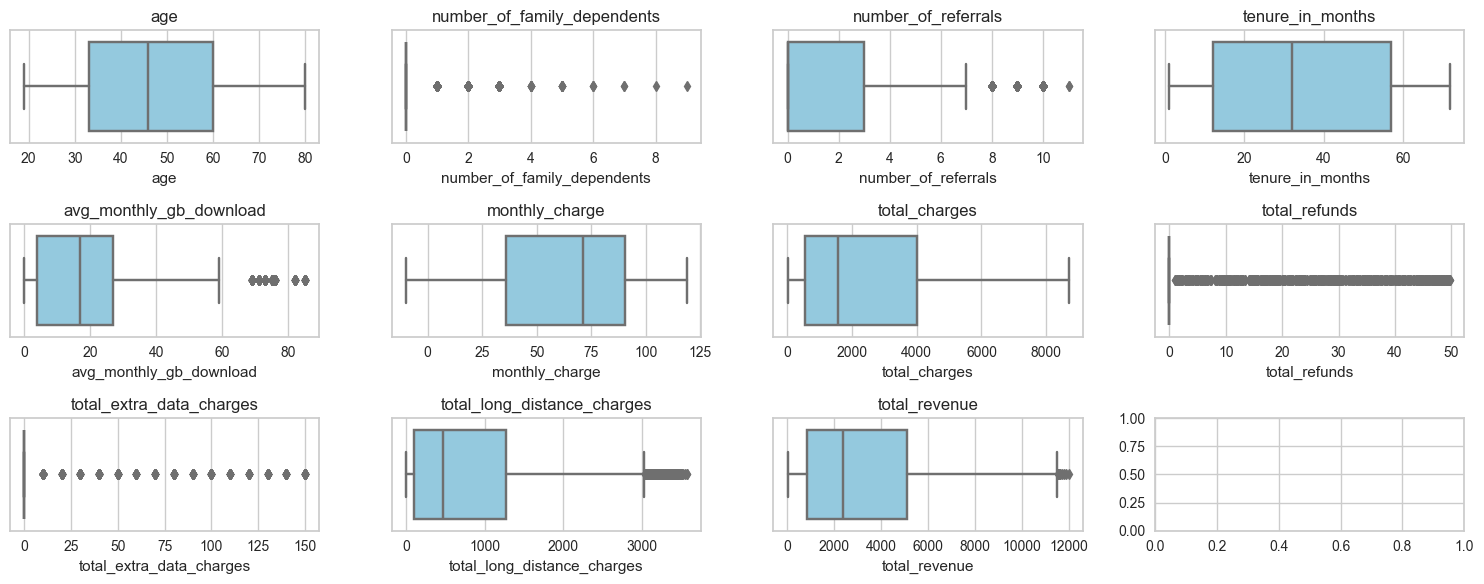

In [12]:
# Plot barplot for these columns
columns_to_plot = ['age', 'number_of_family_dependents', 'number_of_referrals', 'tenure_in_months', 
                    'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 
                    'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']


fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 6))
axs = axs.flatten()

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axs[i], color='skyblue')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()


There is outlier in column "number_of_family_dependents", "number_of_referrals", "avg_monthly_dg_download", "total_refunds", "total_extra_data_charges", "total_long_distance_charges", and "total_revenue". However, sometimes outlier can provide information to the model. I want to check how many data point is outlier in each feature.

In [13]:
print("number_of_family_dependents:", (df['number_of_family_dependents'] > 0).sum())
print("number_of_referrals:", (df['number_of_referrals'] > 7.5).sum())
print("avg_monthly_gb_download:", (df['avg_monthly_gb_download'] > 60).sum())
print("total_refunds:", (df['total_refunds'] > 0).sum())
print("total_extra_data_charges:", (df['total_extra_data_charges'] > 0).sum())

# handle column total_long_distance_charges, as it is hard to know the upper bound by eyes
q1, q3 = np.percentile(df['total_long_distance_charges'], [25, 75])
upper = q3 + (q3-q1) * 1.5
print("total_long_distance_charges:", (df['total_long_distance_charges'] > upper).sum())

# handle column total_long_distance_charges, as it is hard to know the upper bound by eyes
q1, q3 = np.percentile(df['total_revenue'], [25, 75])
upper = q3 + (q3-q1) * 1.5
print("total_revenue:", (df['total_revenue'] > upper).sum())

number_of_family_dependents: 1547
number_of_referrals: 649
avg_monthly_gb_download: 342
total_refunds: 520
total_extra_data_charges: 684
total_long_distance_charges: 136
total_revenue: 9


Looks like some of the featuere has way too many outlier. After looking at the raw data, the value all looks normal, I believe it make sense in this situation. For instance, consider the number of family dependents: most customers have zero family dependents, and very few have 1 to 9 dependents. This pattern still makes sense and maybe the data points with familiy dependents can provide valuable insight for our model. Therefore, I will keep it unchanged. Treat other feature the same, I don't want to remove outliers as I believe they could provide valuable insights.

#### 1.6 Invalid value

In [14]:
# Check if there have number or amount of money less than 0
columns = ['number_of_family_dependents', 'number_of_referrals', 'tenure_in_months', 
           'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 
           'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']

for c in columns:
    less_than_zero = df[df[c] < 0]
    if not less_than_zero.empty:
        print(f"There are values less than 0 in column '{c}'")
        print(f"Number of rows where '{c}' < 0: {len(less_than_zero)}")
    else:
        print(f"No values less than 0 in column '{c}'")

No values less than 0 in column 'number_of_family_dependents'
No values less than 0 in column 'number_of_referrals'
No values less than 0 in column 'tenure_in_months'
No values less than 0 in column 'avg_monthly_gb_download'
There are values less than 0 in column 'monthly_charge'
Number of rows where 'monthly_charge' < 0: 114
No values less than 0 in column 'total_charges'
No values less than 0 in column 'total_refunds'
No values less than 0 in column 'total_extra_data_charges'
No values less than 0 in column 'total_long_distance_charges'
No values less than 0 in column 'total_revenue'


In [15]:
# monthly charge has value less than 0
# Calculate the mean of 'monthly_charge' column
mean_monthly_charge = df['monthly_charge'].mean()

# Replace negative values with the mean
df['monthly_charge'] = df['monthly_charge'].apply(lambda x: mean_monthly_charge if x < 0 else x)

/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

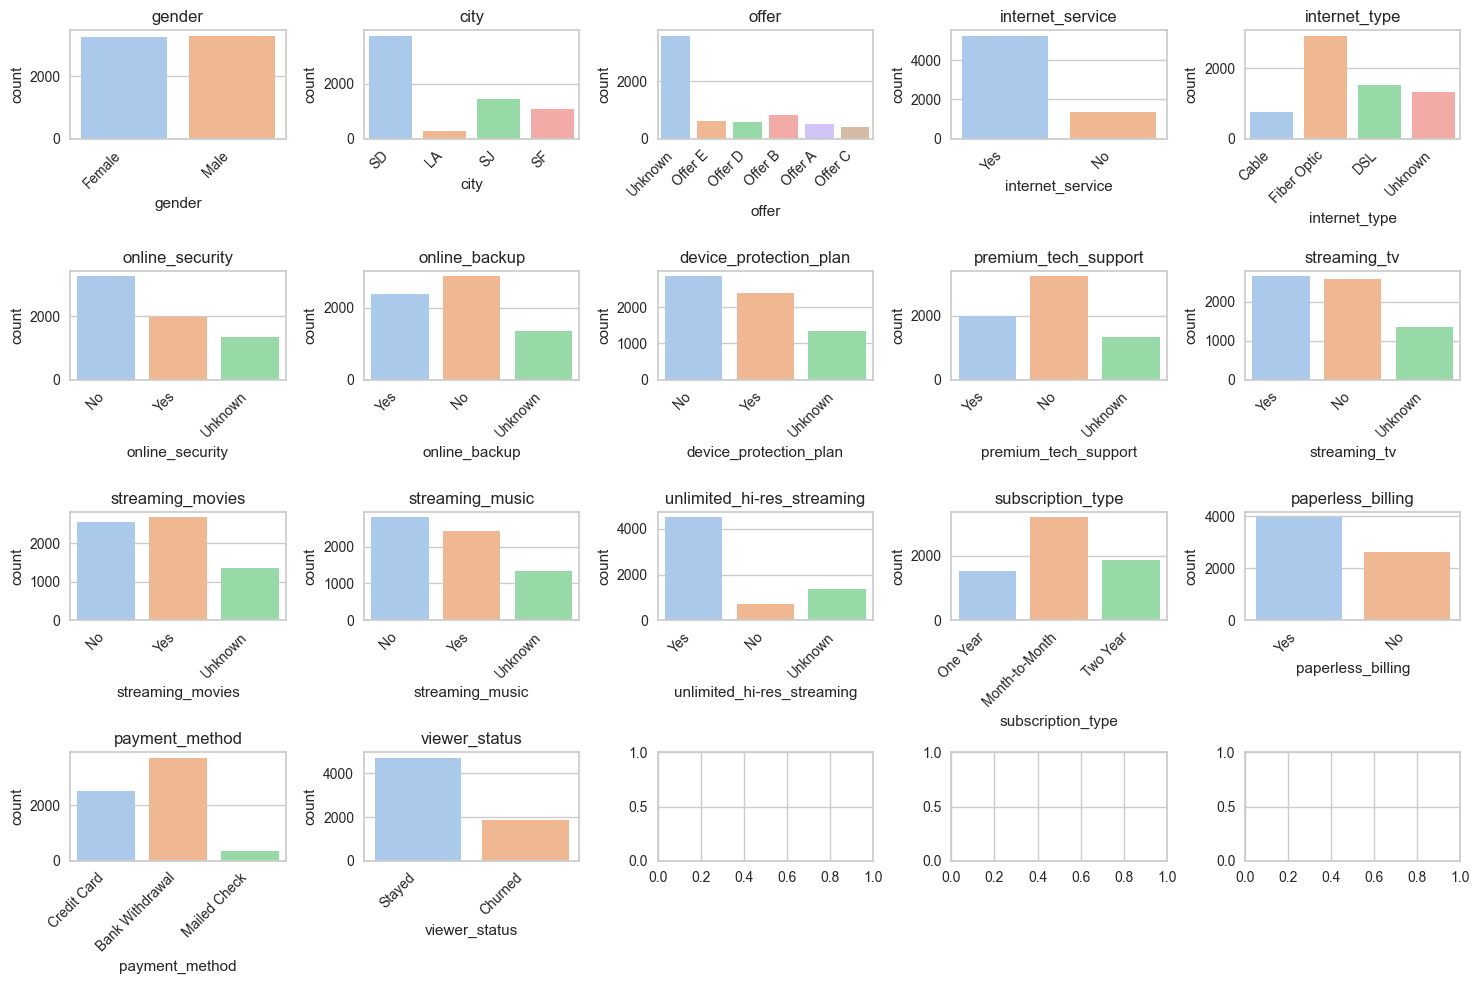

In [16]:
# Check if there is weird value or imbalance target variable
categorical_variables = ['gender', 'city', 'offer', 'internet_service', 'internet_type', 'online_security', 
                          'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv',
                          'streaming_movies', 'streaming_music', 'unlimited_hi-res_streaming', 'subscription_type',
                          'paperless_billing', 'payment_method', 'viewer_status']


fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))
axs = axs.flatten()


for i, variable in enumerate(categorical_variables):
    sns.countplot(data=df, x=variable, ax=axs[i], palette='pastel')
    axs[i].set_title(variable)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()


#### 1.8 Imbalance
With above result, there is no invalid value here. However, our target variable is imbalance, therefore, we will handle imbalance by upsampling the less class samples.


In [17]:
# Separate majority and minority classes
df_majority = df[df['viewer_status'] == 'Stayed']
df_minority = df[df['viewer_status'] == 'Churned']

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),    # Match number of majority class samples
                                 random_state=42)  # Reproducible results

df_resampled = pd.concat([df_majority, df_minority_upsampled])
print(df_resampled['viewer_status'].value_counts())


viewer_status
Stayed     4719
Churned    4719
Name: count, dtype: int64


In [18]:
df_resampled.dtypes

viewer_id                        object
gender                           object
age                               int64
married                          object
number_of_family_dependents       int64
city                             object
zip_code                         object
latitude                        float64
longitude                       float64
number_of_referrals               int64
tenure_in_months                  int64
offer                            object
internet_service                 object
internet_type                    object
avg_monthly_gb_download         float64
online_security                  object
online_backup                    object
device_protection_plan           object
premium_tech_support             object
streaming_tv                     object
streaming_movies                 object
streaming_music                  object
unlimited_hi-res_streaming       object
subscription_type                object
paperless_billing                object


#### 1.9 Correlation

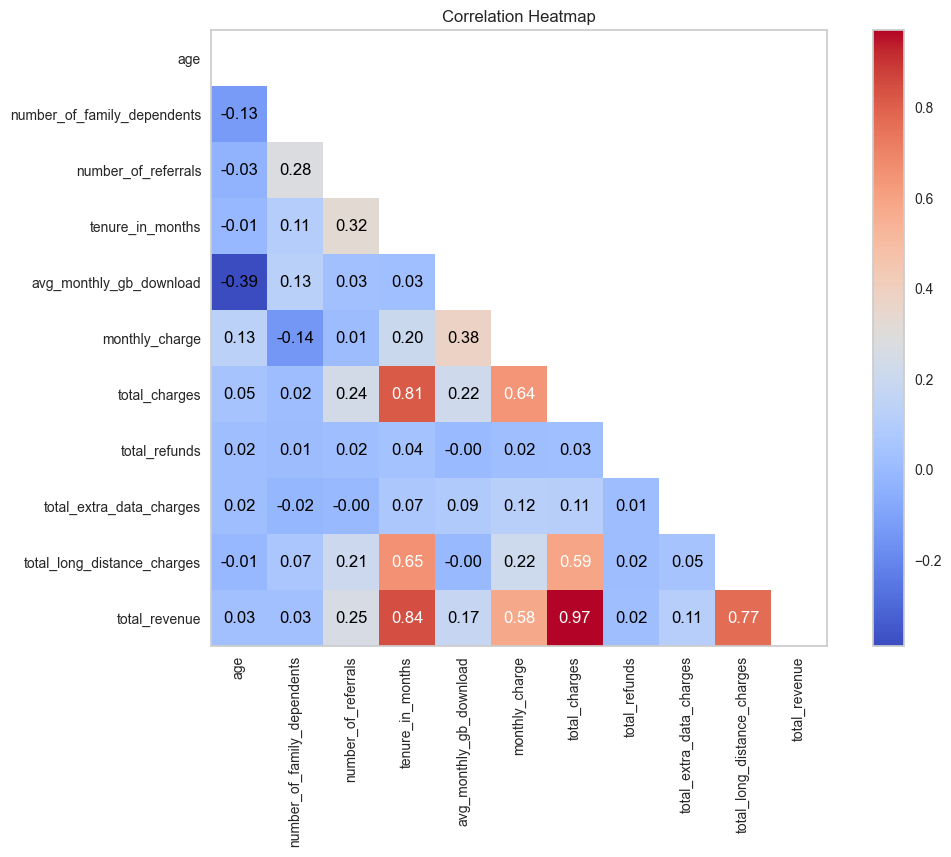

In [19]:
import numpy.ma as ma

df_corr = df[['age', 'number_of_family_dependents', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_gb_download',
              'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']]

correlation_matrix = df_corr.corr()

masked_corr_matrix = ma.masked_where(np.triu(np.ones(correlation_matrix.shape)).astype(bool), correlation_matrix)

plt.figure(figsize=(12, 8))
heatmap = plt.imshow(masked_corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(heatmap)
plt.title('Correlation Heatmap')

for i in range(len(df_corr.columns)):
    for j in range(len(df_corr.columns)):
        if i > j:  # Only annotate the lower triangle
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                text_color = 'white'  # Use white font for strong correlations
            else:
                text_color = 'black'  # Use black font for weak correlations
            plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                     ha='center', va='center', color=text_color)
        else:
            plt.text(j, i, '', ha='center', va='center')  # No annotation for upper triangle

plt.xticks(ticks=np.arange(len(df_corr.columns)), labels=df_corr.columns, rotation=90)  # Rotate x-axis labels
plt.yticks(ticks=np.arange(len(df_corr.columns)), labels=df_corr.columns)
plt.grid(False)
plt.show()

Total Revenue is highly correlated with Total Charges, because Total Revenue = Total Charges - Total Refurnds + Total Extra Data Charges + Total Lond Distance Charges. Since we already have all the column that sum up for Total Revenue, We can remove Total Revenue column. Also longitude and latitude is not valuable informaiton either, therefore, we remove it from the dataset as well.


In [20]:
df_resampled = df_resampled.drop(['total_revenue', 'longitude', 'latitude'], axis=1)

## 2. Feature Selection

#### 2.1 Random Forest Feature Importance

In [21]:
X = df_resampled.drop(['viewer_id', 'viewer_status', 'age_group'], axis=1)
y = df_resampled['viewer_status']

# X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [22]:
categorical = ['married', 'gender', 'city', 'zip_code', 'offer', 'internet_service', 'internet_type', 'online_security', 
                          'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv',
                          'streaming_movies', 'streaming_music', 'unlimited_hi-res_streaming', 'subscription_type',
                          'paperless_billing', 'payment_method']


X_train_categorical = X_train[categorical]
X_test_categorical = X_test[categorical]

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train_categorical)
X_test_encoded = encoder.transform(X_test_categorical)

X_train[categorical] = X_train_encoded
X_test[categorical] = X_test_encoded

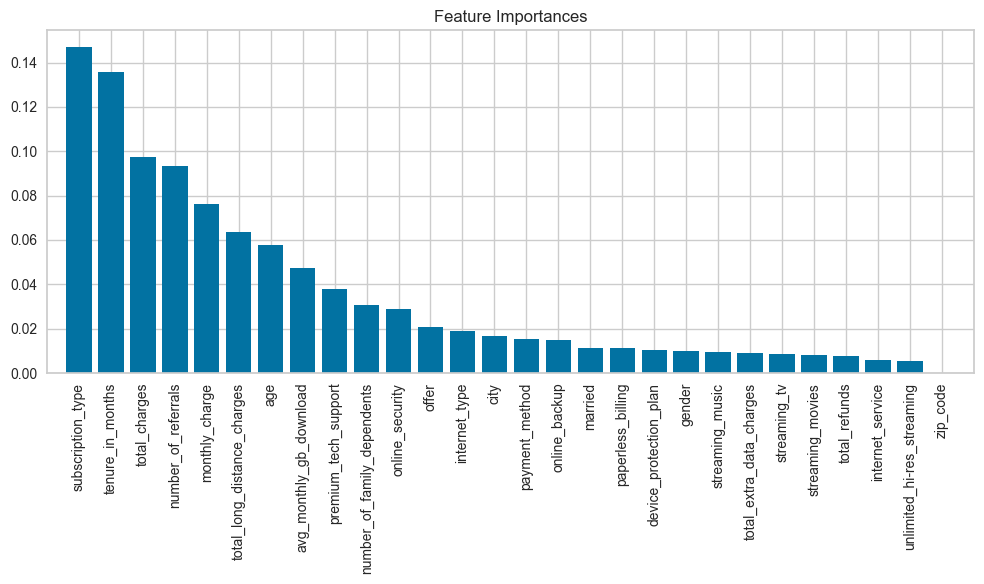

In [23]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


In [24]:
# Print the top 10 features
top_features = X_train.columns[indices][:10]
print("Top 10 Features:")
for feature in top_features:
    print(feature)


Top 10 Features:
subscription_type
tenure_in_months
total_charges
number_of_referrals
monthly_charge
total_long_distance_charges
age
avg_monthly_gb_download
premium_tech_support
number_of_family_dependents


These are the Top 10 features that we going to use for model training.

## 3. KMeans Clustering

#### 3.1 Scaling

In [25]:
df_scale = df.copy()
columns = ['age', 'number_of_family_dependents', 'number_of_referrals', 'tenure_in_months', 
                    'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 
                    'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']
scaler = MinMaxScaler()
df_scale[columns] = scaler.fit_transform(df_scale[columns])


#### 3.2 KMeans model

In [26]:
X_scale_top = df_scale[top_features]

X_scale_encoded_top = pd.get_dummies(X_scale_top)
y_scale = df_scale['viewer_status']

In [27]:
cluster_range = range(1, 11)
inertia = []

for n_clusters in cluster_range:
    kmeans_top = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_top.fit(X_scale_encoded_top)
    inertia.append(kmeans_top.inertia_)


#### 3.3 Elbow plot

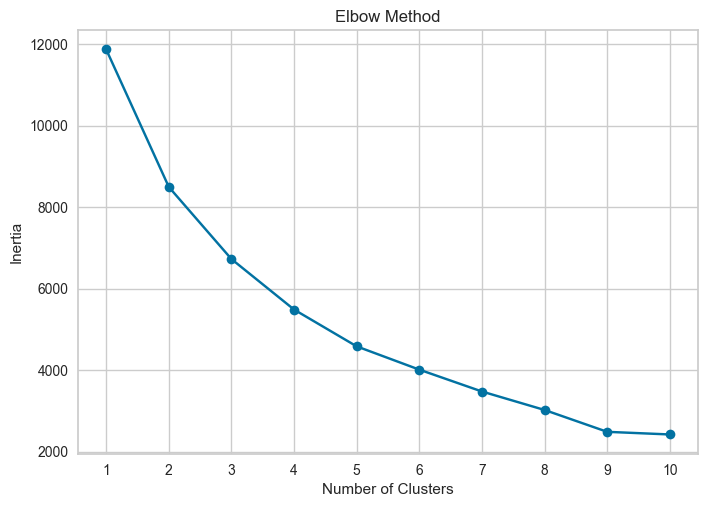

In [28]:
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(cluster_range)
plt.show()

There is difficulty to know how many cluster to pick by looking at elbow plot, therefore, let's try Sihouette score.

#### 3.4 Sihouette Score

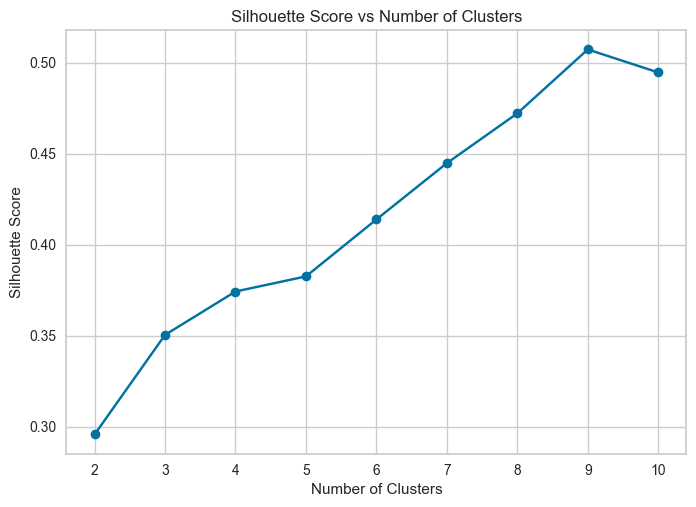

In [29]:
# Define a range of cluster numbers to try
cluster_range = range(2, 11)  # from 2 to 10 clusters

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over each cluster number
for n_clusters in cluster_range:
    # Initialize and fit KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scale_encoded_top)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scale_encoded_top, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

Seems like 9 clusters is the best, but let's plot the plot to confirm.

/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


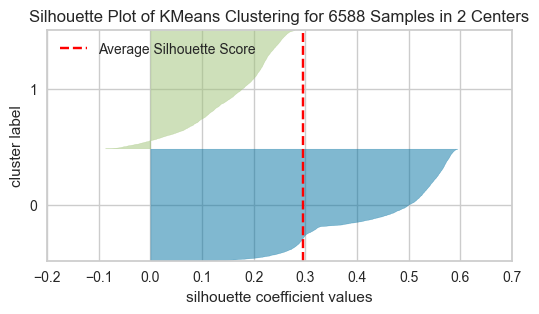

/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


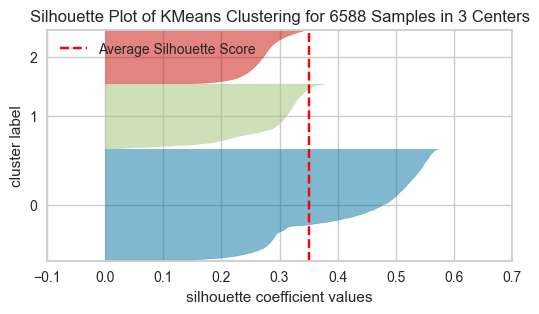

/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


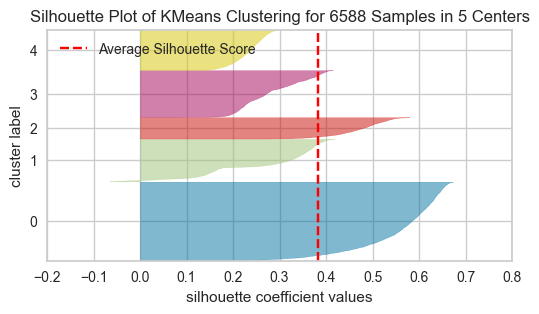

/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


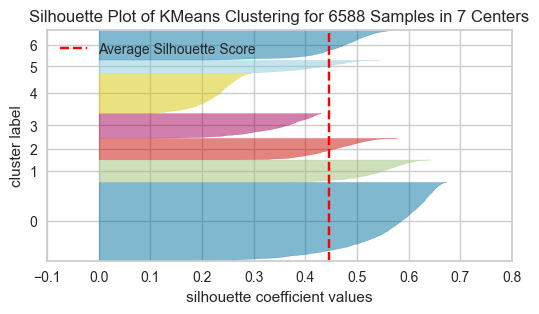

/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


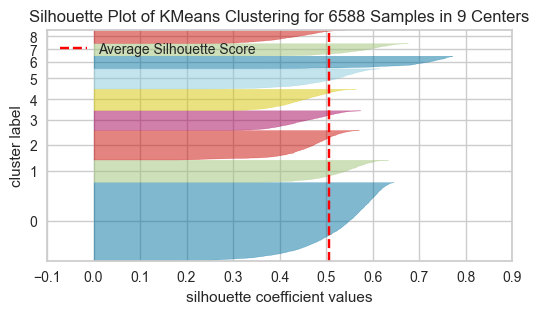

/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


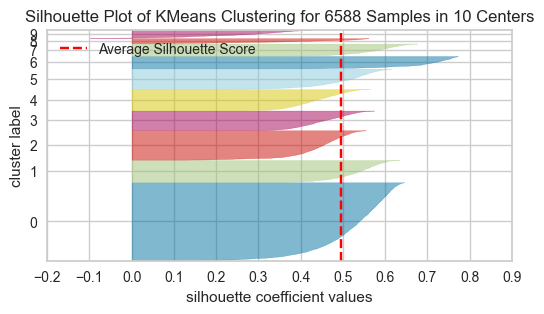

In [30]:
def plot_silhouette(best_cluster, X_scale_encoded_top):
    # Initialize and fit KMeans for the specified number of clusters
    kmeans = KMeans(n_clusters=best_cluster, random_state=42)
    kmeans.fit(X_scale_encoded_top)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Initialize and plot silhouette visualizer
    plt.figure(figsize=(6, 3))  # smaller plot size
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X_scale_encoded_top)
    visualizer.show()

# Call the function for each value of best_cluster
best_clusters = [2, 3, 5, 7, 9, 10]

for best_cluster in best_clusters:
    plot_silhouette(best_cluster, X_scale_encoded_top)

When we cluster into 9 clusters, mose of the cluster are above average, and compare to other number of cluster 9 cluster seesm the best by looking at the size.

/Users/tsaiweiyi/venv3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


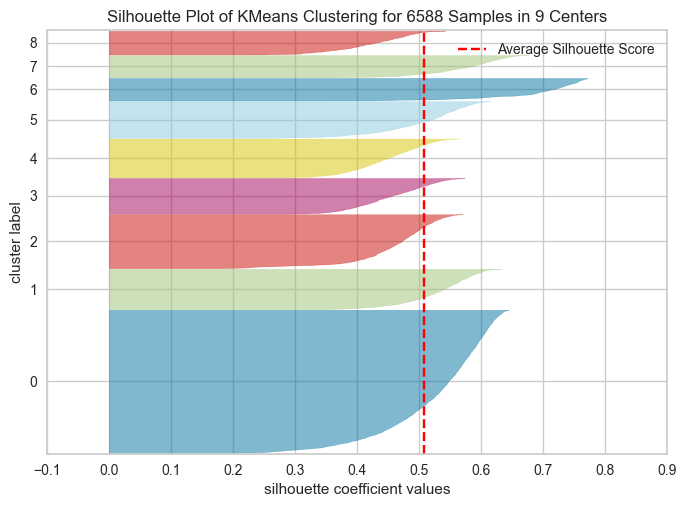

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 6588 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
best_cluster = 9
kmeans_top = KMeans(n_clusters=best_cluster, random_state=42)
kmeans_top.fit(X_scale_encoded_top)

cluster_labels_top = kmeans_top.labels_
X_scale_encoded_top['Cluster'] = cluster_labels_top
cluster_analysis = pd.concat([X_scale_encoded_top, y_scale], axis=1)



X_scale_encoded_top = X_scale_encoded_top.drop(['Cluster'], axis=1)
visualizer_kmeans_top = SilhouetteVisualizer(kmeans_top, colors='yellowbrick')
visualizer_kmeans_top.fit(X_scale_encoded_top)
visualizer_kmeans_top.show()

In [32]:
cluster_target_counts = cluster_analysis.groupby(['Cluster', 'viewer_status']).size()
cluster_counts = cluster_analysis.groupby('Cluster').size()
cluster_target_percentages = cluster_target_counts.div(cluster_counts, level='Cluster') * 100

cluster_results = pd.concat([cluster_target_counts, cluster_target_percentages], axis=1)
cluster_results.columns = ['Count', 'Percentage']
print(cluster_results)

                       Count  Percentage
Cluster viewer_status                   
0       Churned         1350   59.628975
        Stayed           914   40.371025
1       Churned            5    0.784929
        Stayed           632   99.215071
2       Churned           29    3.407756
        Stayed           822   96.592244
3       Churned           75   13.321492
        Stayed           488   86.678508
4       Churned           82   13.398693
        Stayed           530   86.601307
5       Churned          206   35.395189
        Stayed           376   64.604811
6       Churned           99   27.808989
        Stayed           257   72.191011
7       Churned            9    2.564103
        Stayed           342   97.435897
8       Churned           14    3.763441
        Stayed           358   96.236559


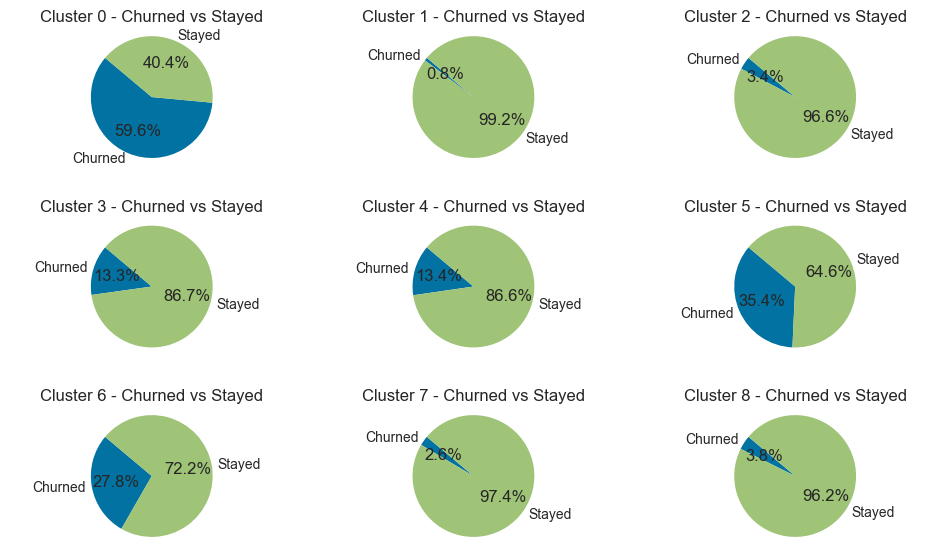

In [33]:
clusters = cluster_results.index.get_level_values('Cluster').unique()

num_cols = 3
num_rows = -(-len(clusters) // num_cols) 

plt.figure(figsize=(10, 2*num_rows)) 
for i, cluster in enumerate(clusters, start=1):
    cluster_data = cluster_results.loc[cluster]
    
    # Extract Churned and Stayed percentages
    churned_percentage = cluster_data.loc['Churned', 'Percentage']
    stayed_percentage = cluster_data.loc['Stayed', 'Percentage']
    
    labels = ['Churned', 'Stayed']
    sizes = [churned_percentage, stayed_percentage]
    
    # Create the pie chart
    plt.subplot(num_rows, num_cols, i)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Cluster {cluster} - Churned vs Stayed')
    plt.axis('equal')

plt.tight_layout(pad=2.0) 
plt.show()

Cluster 0 has the highest churned rate, and following by cluster 5 and cluster 6, this is something marketing team should take good care of to improve retentaion rate.

In [34]:
kmean_result = pd.merge(df_scale, cluster_analysis, how = 'left')

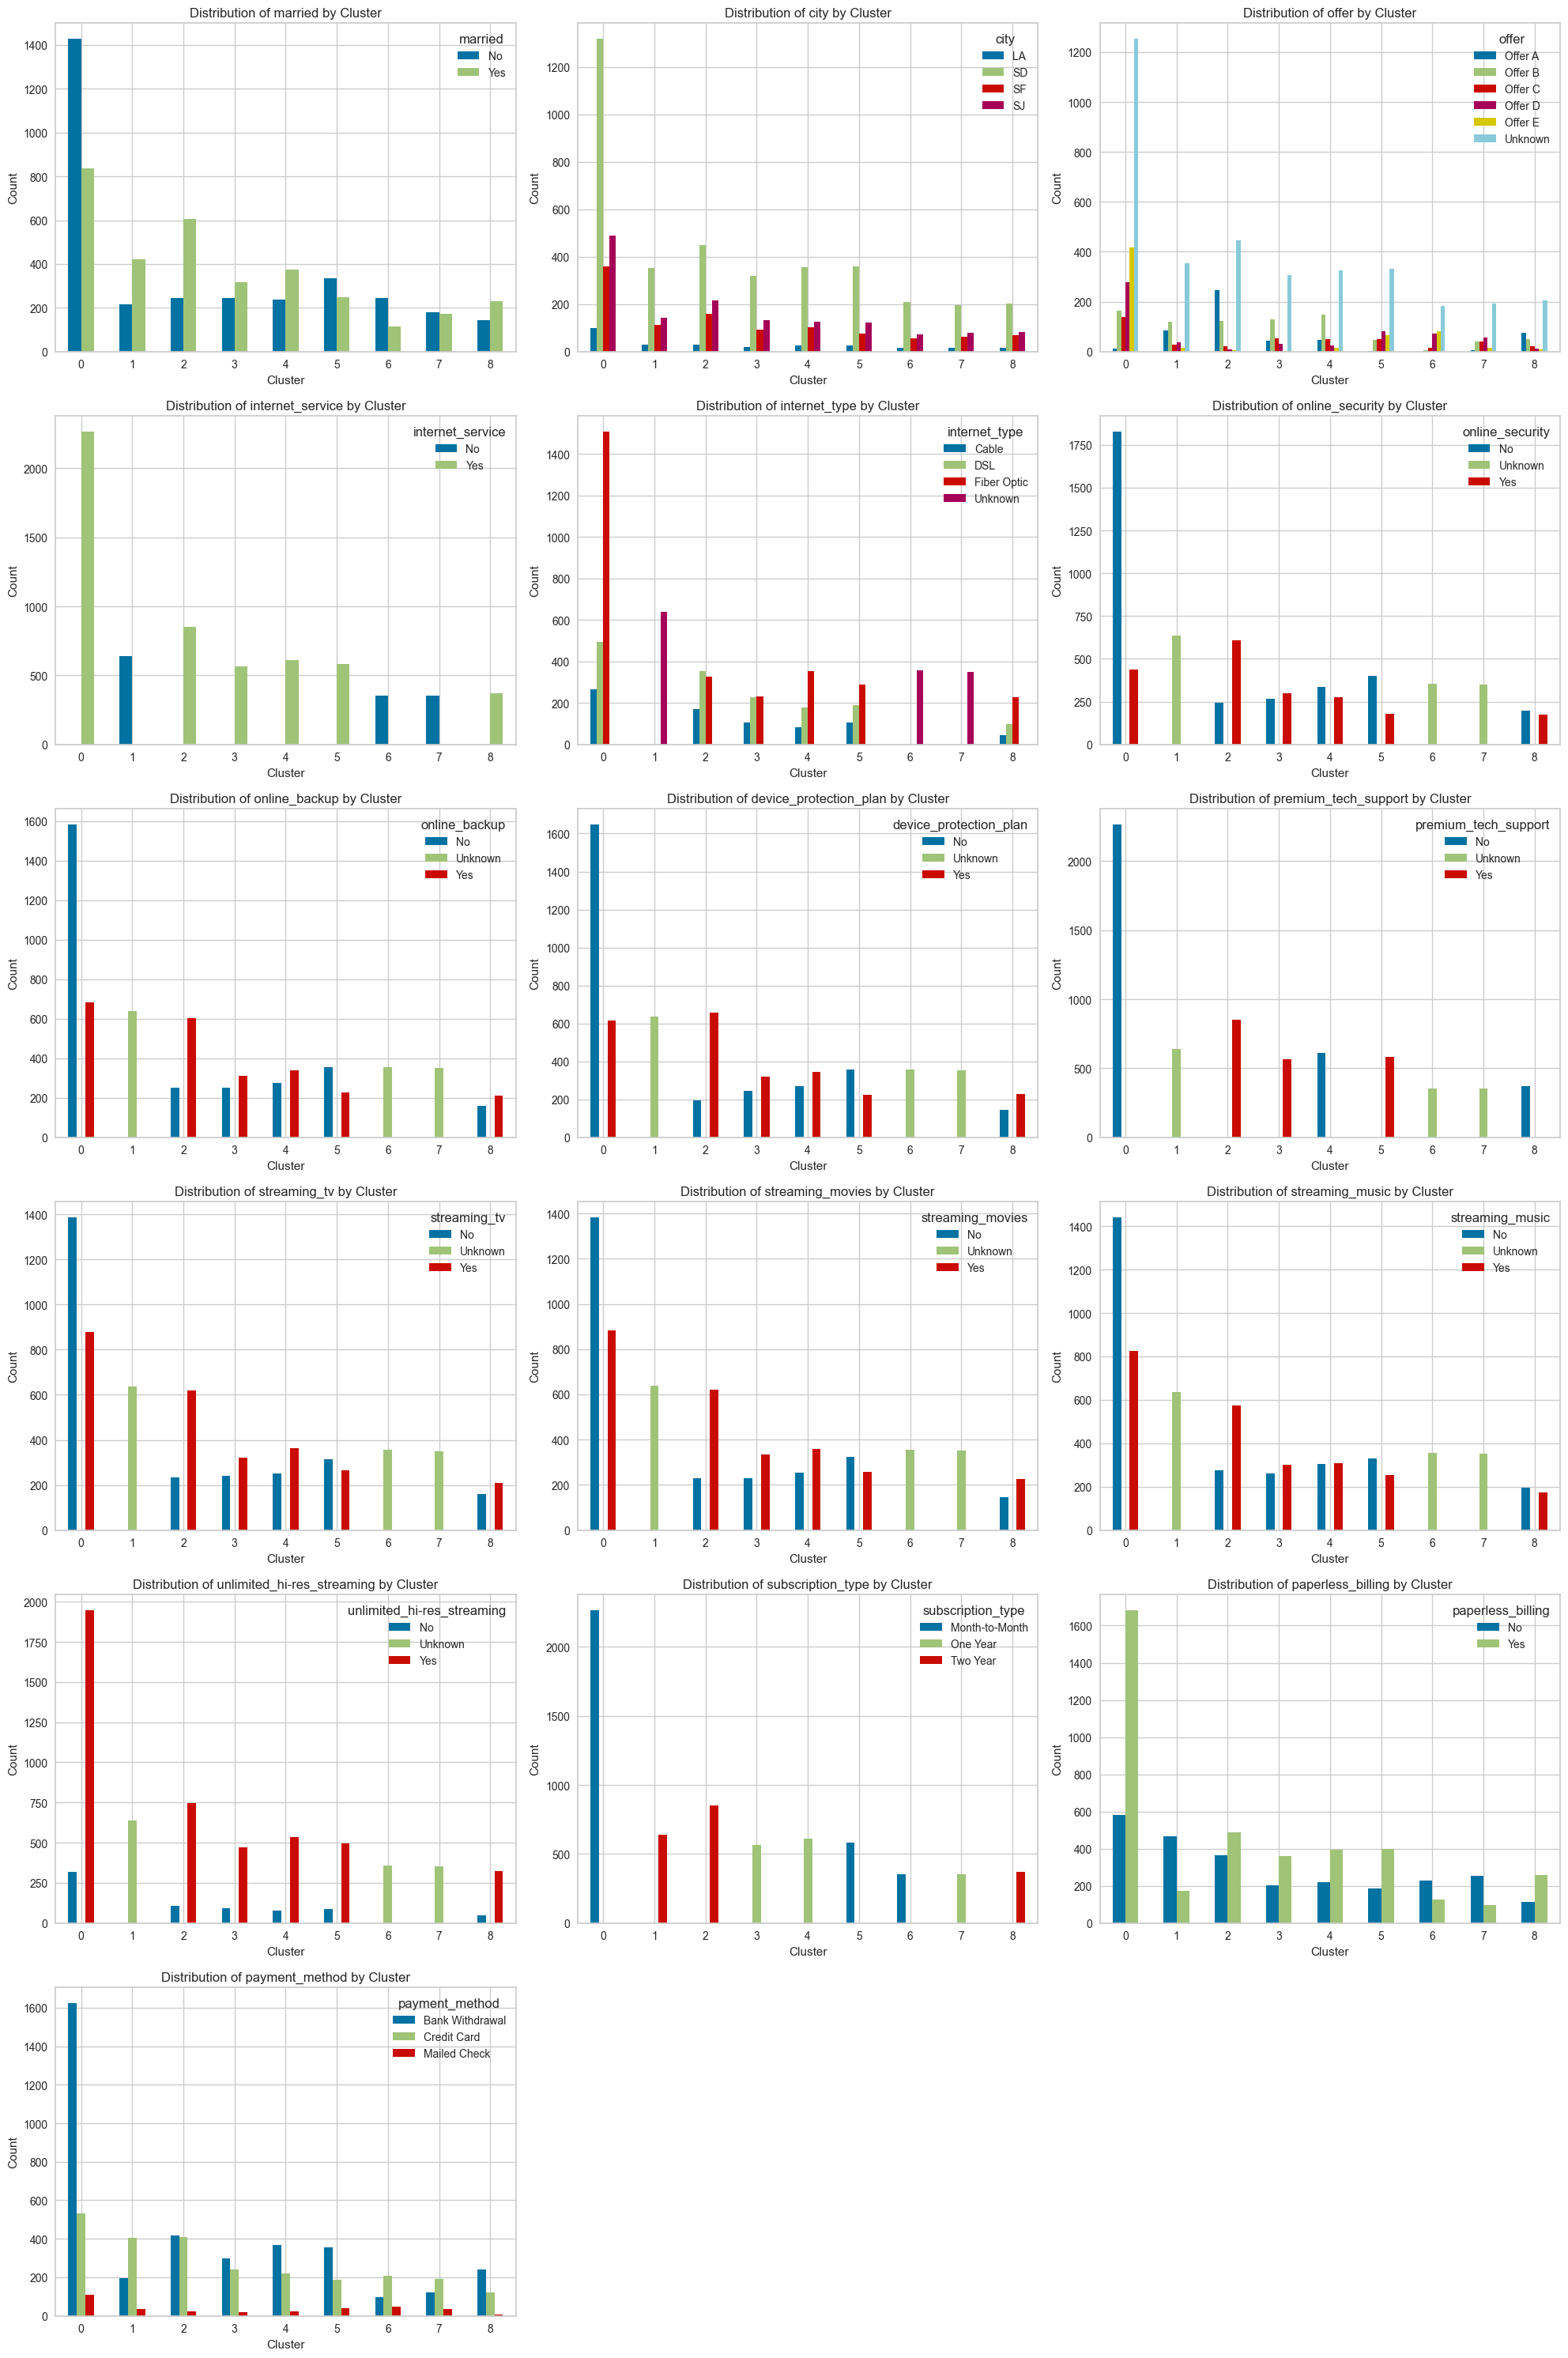

In [35]:
columns_to_visualize = ['married', 'city', 'offer', 'internet_service', 'internet_type', 'online_security',	'online_backup', 'device_protection_plan', 
                        'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_hi-res_streaming', 
                        'subscription_type', 'paperless_billing', 'payment_method']

num_cols = 3
num_rows = -(-len(columns_to_visualize) // num_cols)  

plt.figure(figsize=(20, 5*num_rows)) 
for i, column in enumerate(columns_to_visualize, start=1):
    plt.subplot(num_rows, num_cols, i)
    
    status_counts = kmean_result.groupby(['Cluster', column]).agg({column: 'count'}).rename(columns={column: 'Status'}).reset_index()

    pivot_df = status_counts.pivot(index='Cluster', columns=column, values='Status')

    pivot_df.plot(kind='bar', stacked=False, ax=plt.gca())  # Use current axis
    plt.title(f'Distribution of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title=column)

plt.tight_layout() 
plt.show()

Findings:
1. Cluster 1, 2, and 8, their subscription type are all 2 years; cluster 0, 5, and 6 their subscription type are all month-to-month; cluster 3, 4,and 7, their subscription type are all 1 year.
2. Cluster 2, 3, and 5, they all have premium tech support, and rest of the group do not.

Now we going to look at percentage for other feature, and remove unknown, since unknow means that the customer did not get internet service.

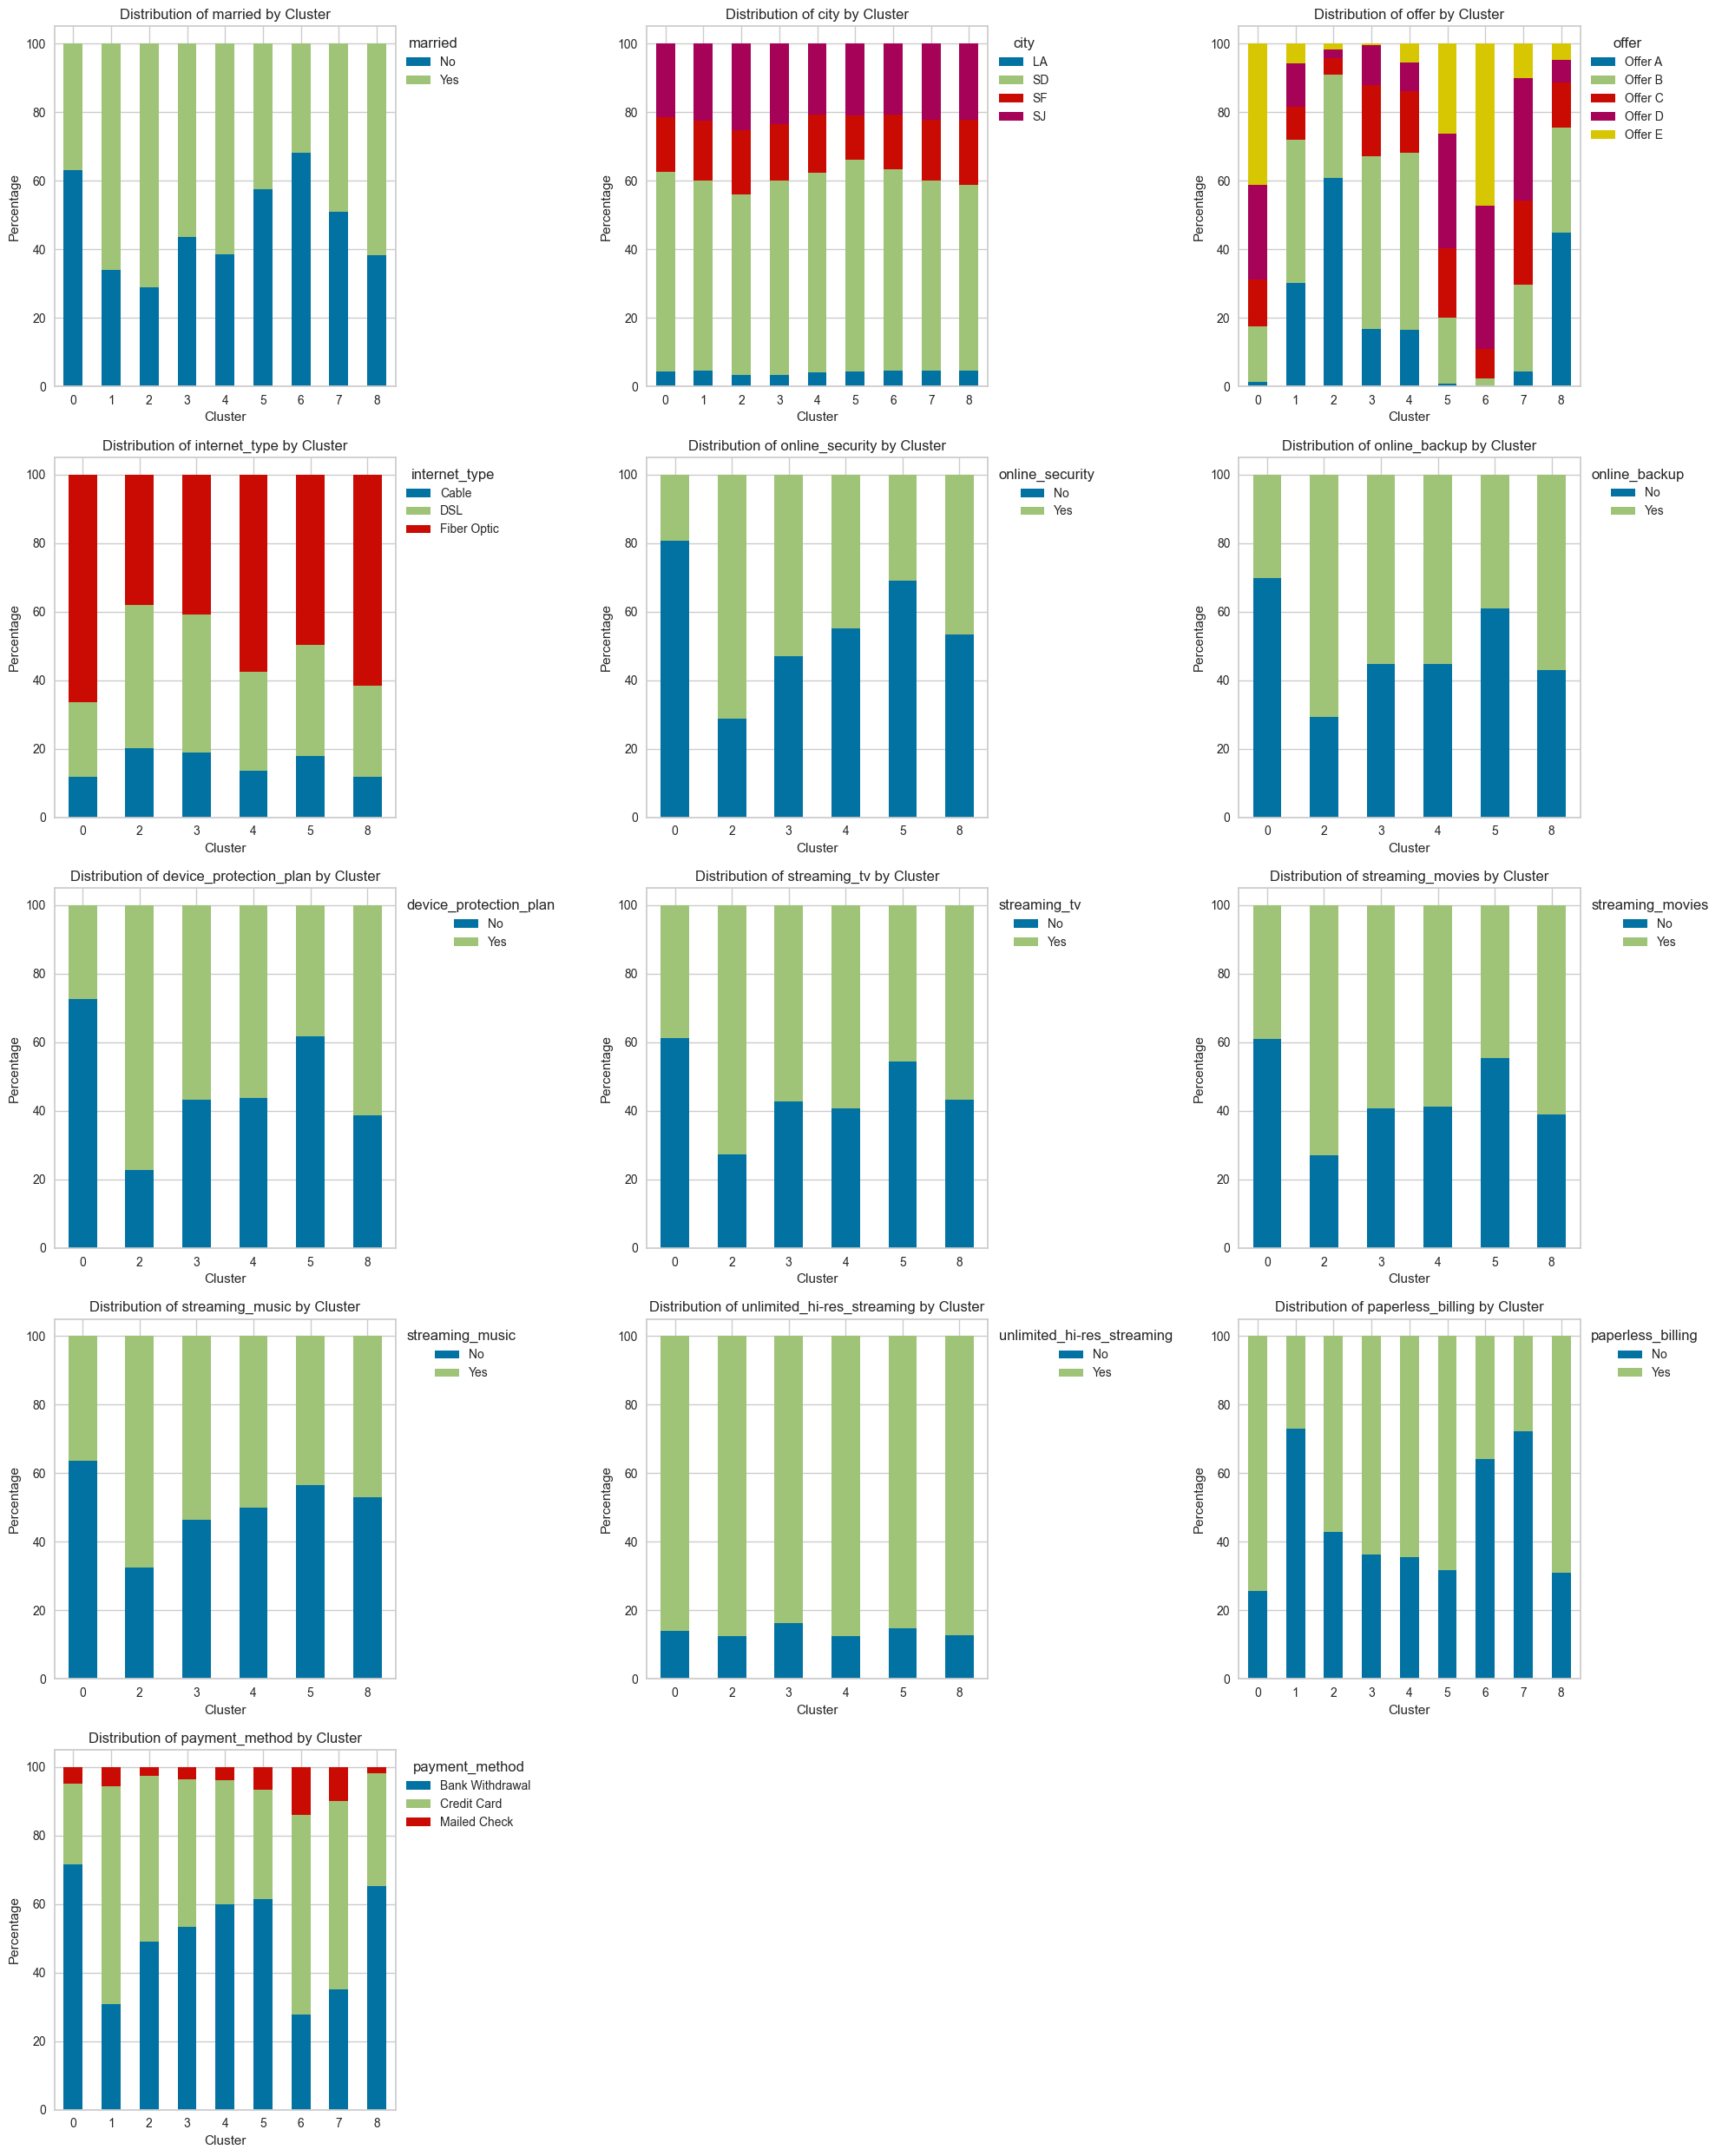

In [36]:
columns_to_visualize = ['married', 'city', 'offer', 'internet_type', 'online_security',	'online_backup', 'device_protection_plan', 
                        'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_hi-res_streaming', 
                        'paperless_billing', 'payment_method']

num_cols = 3
num_rows = -(-len(columns_to_visualize) // num_cols)  

plt.figure(figsize=(20, 5*num_rows)) 
for i, column in enumerate(columns_to_visualize, start=1):
    plt.subplot(num_rows, num_cols, i)

    filtered_result = kmean_result[kmean_result[column] != 'Unknown']

    status_counts = filtered_result.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    cluster_totals = status_counts.sum(axis=1) 
    status_percentages = status_counts.div(cluster_totals, axis=0) * 100 
    
    status_percentages.plot(kind='bar', stacked=True, ax=plt.gca())  
    plt.title(f'Distribution of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    
    plt.legend(title=column, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout() 
plt.show()


Findings
Cluster 0, more customer churned: they are not married, tend to subscribe month-to-month, and also tend to receive offer E. They usually don't add extra services, but surprisingly, compared to other clusters, they have a higher percentage of using fiber optic. Additionally, customers are willing to use paperless billing and bank withdrawal.


In [37]:
kmean_result

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,total_revenue,viewer_status,age_group,subscription_type_Month-to-Month,subscription_type_One Year,subscription_type_Two Year,premium_tech_support_No,premium_tech_support_Unknown,premium_tech_support_Yes,Cluster
0,0002-ORFBO,Female,0.295082,Yes,0.0,SD,0 93225\n1 91206\n2 92627\n3...,34.827662,-118.999073,0.181818,...,0.079714,Stayed,31-40,False,True,False,False,False,True,3
1,0003-MKNFE,Male,0.442623,No,0.0,SD,0 93225\n1 91206\n2 92627\n3...,34.162515,-118.203869,0.000000,...,0.049229,Stayed,41-50,True,False,False,True,False,False,0
2,0004-TLHLJ,Male,0.508197,No,0.0,SD,0 93225\n1 91206\n2 92627\n3...,33.645672,-117.922613,0.000000,...,0.032936,Churned,51-60,True,False,False,True,False,False,0
3,0011-IGKFF,Male,0.967213,Yes,0.0,SD,0 93225\n1 91206\n2 92627\n3...,38.014457,-122.115432,0.090909,...,0.131956,Churned,71-80,True,False,False,True,False,False,0
4,0013-EXCHZ,Female,0.918033,Yes,0.0,SD,0 93225\n1 91206\n2 92627\n3...,34.227846,-119.079903,0.272727,...,0.022406,Churned,71-80,True,False,False,False,False,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,9986-BONCE,Female,0.278689,No,0.0,SJ,0 93225\n1 91206\n2 92627\n3...,33.362575,-117.299644,0.000000,...,0.006015,Churned,31-40,True,False,False,False,True,False,6
6584,9987-LUTYD,Female,0.016393,No,0.0,SJ,0 93225\n1 91206\n2 92627\n3...,32.759327,-116.997260,0.000000,...,0.111069,Stayed,21-30,False,True,False,False,False,True,3
6585,9992-RRAMN,Male,0.344262,Yes,0.0,SJ,0 93225\n1 91206\n2 92627\n3...,37.734971,-120.954271,0.090909,...,0.184691,Churned,41-50,True,False,False,True,False,False,0
6586,9993-LHIEB,Male,0.032787,Yes,0.0,SJ,0 93225\n1 91206\n2 92627\n3...,33.001813,-117.263628,0.454545,...,0.397072,Stayed,21-30,False,False,True,False,False,True,2


## 4. Decision Tree Model

#### 4.1 Split dataset

In [38]:
X = df_resampled[top_features]
y = df_resampled['viewer_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

#### 4.2 Ordinal Encoder

In [39]:
categorical = ['married', 'gender', 'city', 'zip_code', 'offer', 'internet_service', 'internet_type', 'online_security', 
                          'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv',
                          'streaming_movies', 'streaming_music', 'unlimited_hi-res_streaming', 'subscription_type',
                          'paperless_billing', 'payment_method']

categorical = [feature for feature in categorical if feature in top_features]

X_train_categorical = X_train[categorical]
X_test_categorical = X_test[categorical]

encoder = OrdinalEncoder()

X_train_encoded = encoder.fit_transform(X_train_categorical)
X_test_encoded = encoder.transform(X_test_categorical)

X_train[categorical] = X_train_encoded
X_test[categorical] = X_test_encoded



#### 4.3 Best Hyperparameter

In [40]:
max_depth_values = list(range(1, 21))

results = {}

for criterion in ['entropy', 'gini']:
    for max_depth in max_depth_values:
        tree = DecisionTreeClassifier(criterion=criterion, random_state=21, max_depth=max_depth, min_samples_leaf = 1)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        recall_first_class = recall_score(y_test, y_pred, average=None)[0]
        precision_first_class = precision_score(y_test, y_pred, average=None)[0]
        results[(criterion, max_depth)] = {'accuracy': accuracy, 'recall_first_class': recall_first_class, 'precision_first_class': precision_first_class}

# Print the results
for (criterion, max_depth), metrics in results.items():
    accuracy = metrics['accuracy']
    recall_first_class = metrics['recall_first_class']
    precision_first_class = metrics['precision_first_class']
    print(f"Criterion: {criterion}, Max Depth: {max_depth}, Accuracy: {accuracy:.2f}, Churn Recall: {recall_first_class:.2f}, Churn Precision: {precision_first_class:.2f}")


Criterion: entropy, Max Depth: 1, Accuracy: 0.80, Churn Recall: 0.90, Churn Precision: 0.74
Criterion: entropy, Max Depth: 2, Accuracy: 0.80, Churn Recall: 0.90, Churn Precision: 0.74
Criterion: entropy, Max Depth: 3, Accuracy: 0.80, Churn Recall: 0.90, Churn Precision: 0.74
Criterion: entropy, Max Depth: 4, Accuracy: 0.82, Churn Recall: 0.92, Churn Precision: 0.77
Criterion: entropy, Max Depth: 5, Accuracy: 0.84, Churn Recall: 0.81, Churn Precision: 0.86
Criterion: entropy, Max Depth: 6, Accuracy: 0.85, Churn Recall: 0.85, Churn Precision: 0.85
Criterion: entropy, Max Depth: 7, Accuracy: 0.85, Churn Recall: 0.87, Churn Precision: 0.83
Criterion: entropy, Max Depth: 8, Accuracy: 0.86, Churn Recall: 0.91, Churn Precision: 0.82
Criterion: entropy, Max Depth: 9, Accuracy: 0.86, Churn Recall: 0.90, Churn Precision: 0.83
Criterion: entropy, Max Depth: 10, Accuracy: 0.86, Churn Recall: 0.88, Churn Precision: 0.85
Criterion: entropy, Max Depth: 11, Accuracy: 0.88, Churn Recall: 0.95, Churn Pr

#### 4.4 Best result

In [41]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 17, random_state=21, min_samples_leaf=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dt:.2f}")
precision_dt = precision_score(y_test, y_pred, pos_label='Churned')
recall_dt = recall_score(y_test, y_pred, pos_label='Churned')
print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

     Churned       0.88      0.96      0.92       943
      Stayed       0.95      0.88      0.91       945

    accuracy                           0.92      1888
   macro avg       0.92      0.92      0.92      1888
weighted avg       0.92      0.92      0.92      1888



#### 4.5 Print tree

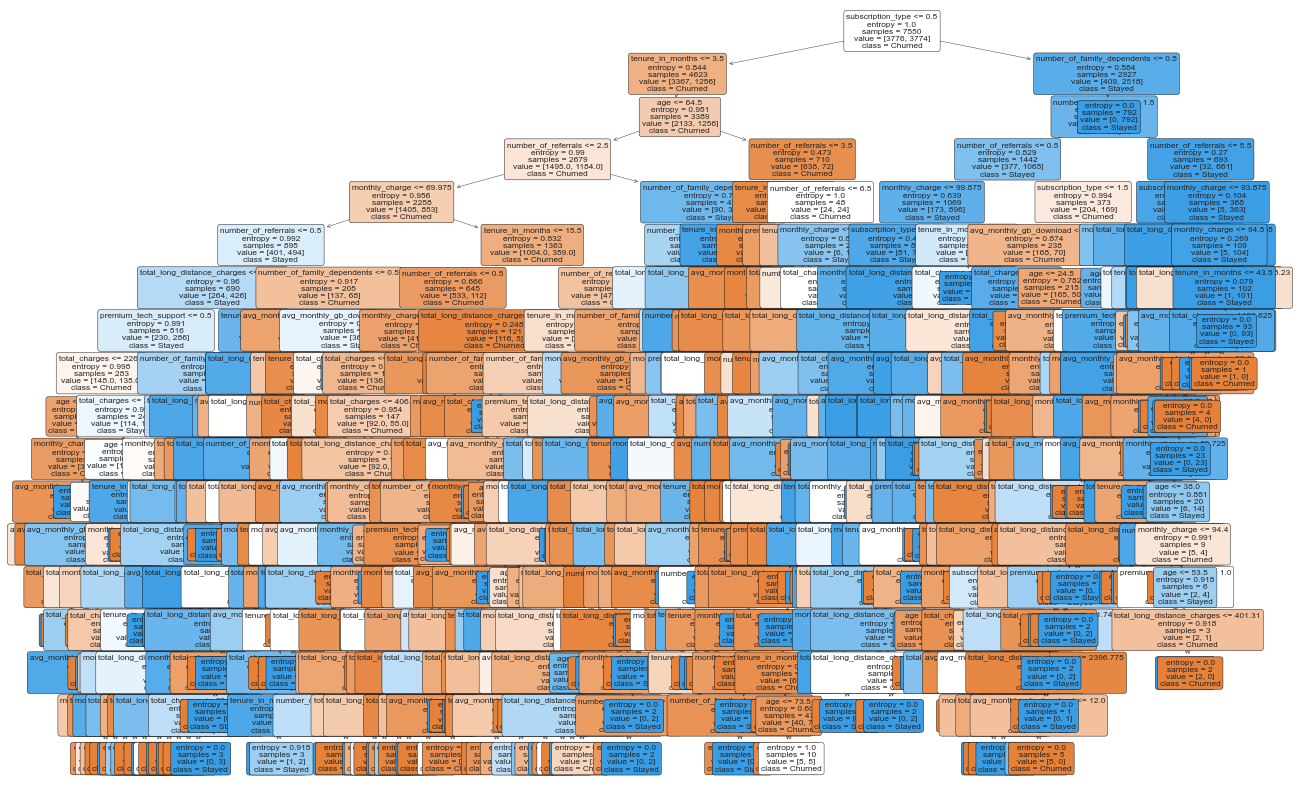

In [42]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=X_train.columns, class_names=tree.classes_, filled=True, rounded=True, fontsize=6)
plt.show()

## 5. Random Forest Model

#### 5.1 Best Hyperparameter

In [43]:
n_estimators_values = [50, 100, 150]
max_depth_values = [None, 5, 10]

results = {}

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

        rf_classifier.fit(X_train, y_train)
        y_pred = rf_classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label='Churned')
        recall = recall_score(y_test, y_pred, pos_label='Churned')

        results[(n_estimators, max_depth)] = {'accuracy': accuracy, 'precision': precision, 'recall': recall}

for (n_estimators, max_depth), metrics in results.items():
    accuracy = metrics['accuracy']
    precision = metrics['precision']
    recall = metrics['recall']
    print(f"n_estimators={n_estimators}, max_depth={max_depth}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}")


n_estimators=50, max_depth=None: Accuracy=0.94, Precision=0.90, Recall=0.98
n_estimators=50, max_depth=5: Accuracy=0.85, Precision=0.84, Recall=0.87
n_estimators=50, max_depth=10: Accuracy=0.90, Precision=0.88, Recall=0.94
n_estimators=100, max_depth=None: Accuracy=0.94, Precision=0.91, Recall=0.98
n_estimators=100, max_depth=5: Accuracy=0.85, Precision=0.84, Recall=0.88
n_estimators=100, max_depth=10: Accuracy=0.91, Precision=0.88, Recall=0.95
n_estimators=150, max_depth=None: Accuracy=0.94, Precision=0.91, Recall=0.97
n_estimators=150, max_depth=5: Accuracy=0.85, Precision=0.84, Recall=0.87
n_estimators=150, max_depth=10: Accuracy=0.90, Precision=0.88, Recall=0.94


#### 5.2 Best Result

In [44]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy_rf:.2f}")
precision_rf = precision_score(y_test, y_pred, pos_label='Churned')
recall_rf = recall_score(y_test, y_pred, pos_label='Churned')
print(classification_report(y_test, y_pred))


Accuracy: 0.94
              precision    recall  f1-score   support

     Churned       0.91      0.98      0.94       943
      Stayed       0.97      0.90      0.94       945

    accuracy                           0.94      1888
   macro avg       0.94      0.94      0.94      1888
weighted avg       0.94      0.94      0.94      1888



## 5. K-NN Model

#### 5.1 Scaling

In [45]:
columns = ['age', 'number_of_family_dependents', 'number_of_referrals', 'tenure_in_months',
                    'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 
                    'total_extra_data_charges', 'total_long_distance_charges']
scaler = MinMaxScaler()
df_resampled[columns] = scaler.fit_transform(df_resampled[columns])


#### 5.2 Split dataset

In [46]:
X = df_resampled[top_features]
y = df_resampled['viewer_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

#### 5.3 Ordinal Encoder

In [47]:
categorical = ['married', 'gender', 'city', 'zip_code', 'offer', 'internet_service', 'internet_type', 'online_security', 
                          'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv',
                          'streaming_movies', 'streaming_music', 'unlimited_hi-res_streaming', 'subscription_type',
                          'paperless_billing', 'payment_method']

categorical = [feature for feature in categorical if feature in top_features]

X_train_categorical = X_train[categorical]
X_test_categorical = X_test[categorical]

encoder = OrdinalEncoder()

X_train_encoded = encoder.fit_transform(X_train_categorical)
X_test_encoded = encoder.transform(X_test_categorical)

X_train[categorical] = X_train_encoded
X_test[categorical] = X_test_encoded



#### 5.4 Best Hyperparameter

In [48]:
neighbors_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

accuracy_results = {}
precision_results = {}
recall_results = {}

for n_neighbors in neighbors_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric='minkowski')
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Churned')
    recall = recall_score(y_test, y_pred, pos_label='Churned')

    accuracy_results[n_neighbors] = accuracy
    precision_results[n_neighbors] = precision
    recall_results[n_neighbors] = recall

for n_neighbors, accuracy in accuracy_results.items():
    print(f"Neighbors: {n_neighbors}, Accuracy: {accuracy:.2f}, Precision: {precision_results[n_neighbors]:.2f}, Recall: {recall_results[n_neighbors]:.2f}")


Neighbors: 1, Accuracy: 0.91, Precision: 0.88, Recall: 0.95
Neighbors: 2, Accuracy: 0.88, Precision: 0.81, Recall: 0.97
Neighbors: 3, Accuracy: 0.87, Precision: 0.83, Recall: 0.92
Neighbors: 4, Accuracy: 0.84, Precision: 0.79, Recall: 0.94
Neighbors: 5, Accuracy: 0.85, Precision: 0.82, Recall: 0.90
Neighbors: 6, Accuracy: 0.84, Precision: 0.79, Recall: 0.93
Neighbors: 7, Accuracy: 0.85, Precision: 0.81, Recall: 0.90
Neighbors: 8, Accuracy: 0.84, Precision: 0.79, Recall: 0.92
Neighbors: 9, Accuracy: 0.84, Precision: 0.81, Recall: 0.88
Neighbors: 10, Accuracy: 0.84, Precision: 0.80, Recall: 0.90
Neighbors: 11, Accuracy: 0.83, Precision: 0.81, Recall: 0.86
Neighbors: 12, Accuracy: 0.83, Precision: 0.80, Recall: 0.88
Neighbors: 13, Accuracy: 0.83, Precision: 0.82, Recall: 0.87
Neighbors: 14, Accuracy: 0.84, Precision: 0.80, Recall: 0.89
Neighbors: 15, Accuracy: 0.84, Precision: 0.81, Recall: 0.88


#### 5.5 Best Result

In [49]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

# Evaluate performance
accuracy_knn = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy_knn:.2f}")
precision_knn = precision_score(y_test, y_pred, pos_label='Churned')
recall_knn = recall_score(y_test, y_pred, pos_label='Churned')
print(classification_report(y_test, y_pred))


Accuracy: 0.91
              precision    recall  f1-score   support

     Churned       0.88      0.95      0.91       943
      Stayed       0.94      0.87      0.91       945

    accuracy                           0.91      1888
   macro avg       0.91      0.91      0.91      1888
weighted avg       0.91      0.91      0.91      1888



## 6. Summary

In [50]:
results = {"Classifier": [], "Accuracy": [], "Precision": [], "Recall": []}


results["Classifier"] = ['KNN', 'Decision Tree', 'Random Forest']
results["Accuracy"] = [accuracy_knn, accuracy_dt, accuracy_rf]
results["Precision"] = [precision_knn, precision_dt, precision_rf]
results["Recall"] = [recall_knn, recall_dt, recall_rf]

# Round the values to 2 decimal places
for key, values in results.items():
    if key != "Classifier":
        results[key] = [round(value, 2) for value in values]

df_results = pd.DataFrame(results)
df_results

,Classifier,Accuracy,Precision,Recall
0,KNN,0.91,0.88,0.95
1,Decision Tree,0.92,0.88,0.96
2,Random Forest,0.94,0.91,0.98


Overall, I tried 3 model, including KNN, Decision Tree, and Random Tree. Before traing these model I have worked on below
1. Change data type
2. Handle missing value
3. Handle ourlier
4. Handle invalid value
5. Handle imbalance target variable
6. feature selection

KNN
1. Scale data
2. Elbow plot find best K
3. Try both all feature and top 10 feature
4. Compare result with Silhouette score

Decision Tree & Random Forest
1. Encode data
2. Find best hyperparameter
3. Get best result

Random forest perform the best. With 0.97 recall means that for all customer who churned we can correctly predict 97% right. This is the most important feature for the company to look at, because we do not want to miss it.

I prevent overfitting by setting max depth and min num of sample in leaf for tree model.

The Top 10 feature is as below:
subscription_type,
tenure_in_months,
total_charges,
number_of_referrals,
monthly_charge,
total_long_distance_charges,
age,
avg_monthly_gb_download,
premium_tech_support,
number_of_family_dependents

3 Recommendations:
1. subscription: With month-to-month subscription, customer tend to have a higher chruned rate. On the other side, customer with one year or two year subscriotion, have a lower churned rate. Therefore, We should set marketing strategies to make people subscribe longer to make them stay with us.
2. Also, we should provide more ways to make people refer our product to other people, because when our customer makes referrals, they tend to stay with us.
3. Moreover, people who have migher monthly charges, stay with us too. it is more efficient for us to keep them than to get new customer, so maybe We should provide VIP plan to satisfy them.

If just focusing on people who churned, which is Cluster 0. They are not married, tend to subscribe month-to-month, and also tend to receive offer E. They usually don't add extra services, but surprisingly, compared to other clusters, they have a higher percentage of using fiber optic. Additionally, customers are willing to use paperless billing and bank withdrawal.